# Анализ данных и линейная регрессия

В этом ноутбуке я попытаюсь исследовать датасет, скачанный отсюда: https://www.kaggle.com/budincsevity/szeged-weather

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv("./weatherHistory.csv")
data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


## Исследование датасета

Попытаемся подробнее узнать что-то о данных:
1. сколько у нас есть признаков?
2. к какому типу они относятся? (категориальные, вещественнозначные)
3. есть ли пропуски в данных?

In [32]:
print("Всего %d признаков" % len(data.columns), ":")
print(data.columns.values)

Всего 12 признаков :
['Formatted Date' 'Summary' 'Precip Type' 'Temperature (C)'
 'Apparent Temperature (C)' 'Humidity' 'Wind Speed (km/h)'
 'Wind Bearing (degrees)' 'Visibility (km)' 'Loud Cover'
 'Pressure (millibars)' 'Daily Summary']


In [28]:
print("Среди них", (data.dtypes == "float64").values.sum(), "вещественных")

Среди них 8 вещественных


In [42]:
data.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

В данных есть пропуски. В признаке *Precip Type* 517 пропусков.

## Исследование отдельных признаков

Теперь исследуем каждый признак в отдельности:

1. какой диапазон у вещественнозначных признаков?
2. сколько значений признаков у категориальных данных?

In [37]:
# Признак Summary

print("Число уникальных значений этого признака:", len(data.Summary.unique()))

Число уникальных значений этого признака: 27


In [44]:
data.Summary.unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

Признак Summary содержит ключевые слова, описывающие погоду. Например, этот признак может говорить об уровне облачности, осадков, наличии тумана и т.д.

Судя по всему этот признак составлялся с использованием людей. Поэтому если мы хотим создавать систему для автоматического предсказания некоторых значений на основе данных о погоде, то этот признак мы не можем использовать, т.к. его сбор потребует участие человека.

In [50]:
# Признак Precip Type

data["Precip Type"].unique()

array(['rain', 'snow', nan], dtype=object)

Признак *Precip Type* содержит информацию о виде осадков. Пропущенные значения могут говорить об отсутствии осадков, поэтому адекватным способом заполнения этих пропусков будет создание нового класса.

In [57]:
# Признак Temperature (C)

print("Минимальная температура %.2f" % data["Temperature (C)"].min())
print("Максимальная температура %.2f" % data["Temperature (C)"].max())
print("Средняя температура %.2f" % data["Temperature (C)"].mean())
print("Медиана температуры %.2f" % data["Temperature (C)"].median())

Минимальная температура -21.82
Максимальная температура 39.91
Средняя температура 11.93
Медиана температуры 12.00


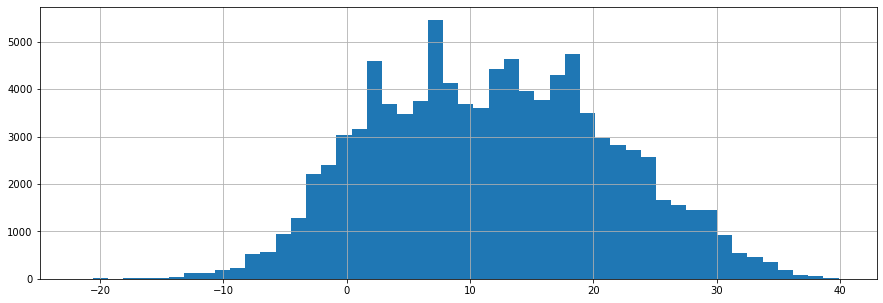

In [79]:
def plot_hist(hist_data, **kwargs):
    plt.figure(figsize=(15, 5))
    plt.hist(hist_data, **kwargs)
    plt.grid(True)
    plt.show()
    
plot_hist(data["Temperature (C)"].values, bins=50)

In [74]:
(data["Temperature (C)"].values < -0).mean() * 100

10.768975563227686

Минимальная температура -27.72
Максимальная температура 39.34
Средняя температура 10.86
Медиана температуры 12.00


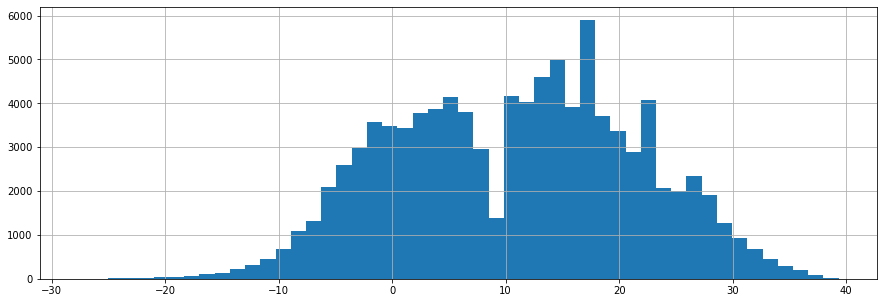

In [83]:
# Apparent Temperature (C)

print("Минимальная температура %.2f" % data["Apparent Temperature (C)"].min())
print("Максимальная температура %.2f" % data["Apparent Temperature (C)"].max())
print("Средняя температура %.2f" % data["Apparent Temperature (C)"].mean())
print("Медиана температуры %.2f" % data["Apparent Temperature (C)"].median())

plot_hist(data["Apparent Temperature (C)"], bins=50)

In [89]:
# Loud Cover

data["Loud Cover"].unique()

array([0.])

Loud Cover оказался бесполезным признаком. Он принимает только одно значение: 0.0. В дальнейшем его можно выбросить из рассмотрения

## Исследование зависимости признаков

Проанализируем, как имеющиеся вещественнозначные признаки связаны друг с другом:
1. У каких признаков наиболее высокий модуль корреляции Пирсона друг с другом?
2. У каких признаков наиболее высокий модуль корреляции Спирмена друг с другом?
3. 

**Внимание:** здесь и далее разбейте выборку на обучающую, валидационную и тестовую. Тестовая выборка не должна использоваться ни при обучении, ни при  подборе гиперпараметров, ни при понижении исходного признакового пространства.

In [118]:
# Исключим константный признак
data = data.drop(columns="Loud Cover")

# Разобьём данные на обучающую, валидационную и тестовую выборки
X = data.drop(columns="Apparent Temperature (C)").select_dtypes(include='number').to_numpy()
y = data["Apparent Temperature (C)"].to_numpy()

features_names = data.drop(columns="Apparent Temperature (C)").select_dtypes(include='number').columns

In [140]:
len(features_names)

6

In [119]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1337)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1,
                                                     random_state=1337)

In [135]:
def calculate_feature_relationship(x, features_names, relationship_function):
    relationship_info = []
    for i, feature1_name in enumerate(features_names):
        for j, feature2_name in enumerate(features_names):
            if i > j:
                relationship_info.append([relationship_function(x[:, i], x[:, j]),
                                        feature1_name, feature2_name])
    
    def maximize_relationship(element):
        return -abs(element[0][0])
    relationship_info.sort(key=maximize_relationship)

    return relationship_info

In [138]:
from scipy.stats import pearsonr, spearmanr

PLCC_relationship = calculate_feature_relationship(x_train, features_names, pearsonr)
PLCC_relationship[:5]

[[(-0.6322446568081479, 0.0), 'Humidity', 'Temperature (C)'],
 [(0.3931176143618101, 0.0), 'Visibility (km)', 'Temperature (C)'],
 [(-0.3696608603836532, 0.0), 'Visibility (km)', 'Humidity'],
 [(-0.22487251177643866, 0.0), 'Wind Speed (km/h)', 'Humidity'],
 [(0.10639619767084621, 1.964314567655715e-195),
  'Wind Bearing (degrees)',
  'Wind Speed (km/h)']]

In [139]:
SROCC_relationship = calculate_feature_relationship(x_train, features_names, spearmanr)
SROCC_relationship[:5]

[[SpearmanrResult(correlation=-0.588513856882921, pvalue=0.0),
  'Humidity',
  'Temperature (C)'],
 [SpearmanrResult(correlation=-0.4327313359484954, pvalue=0.0),
  'Visibility (km)',
  'Humidity'],
 [SpearmanrResult(correlation=0.39422693235156586, pvalue=0.0),
  'Visibility (km)',
  'Temperature (C)'],
 [SpearmanrResult(correlation=-0.3044755334812228, pvalue=0.0),
  'Pressure (millibars)',
  'Temperature (C)'],
 [SpearmanrResult(correlation=-0.2618795590578995, pvalue=0.0),
  'Wind Speed (km/h)',
  'Humidity']]

**Ответ:** наиболее высокую корреляцию (как Пирсона, так и Спирмена) показали признаки *Humidity* и *Temperature (C)*:
* корреляция Пирсона у них -0.63
* корреляция Спирмена у них -0.59

Можно утверждать, что эти признаки имеют сильную (и даже линейную) зависимость. Они в некоторой степени (около 60%) обратнопропорциональны.

Теперь проанализируем, насколько сильно рассматриваемые признаки коррелируют с откликом.

In [142]:
def calculate_feature2answer_relationship(x, y, relationship_function):
    relationship_info = []
    for i, feature_name in enumerate(features_names):
        relationship_info.append([relationship_function(x[:, i], y),
                                        feature_name])
    
    def maximize_relationship(element):
        return -abs(element[0][0])
    relationship_info.sort(key=maximize_relationship)

    return relationship_info

In [143]:
PLCC_relations_with_answer = calculate_feature2answer_relationship(x_train, y_train, pearsonr)
PLCC_relations_with_answer

[[(0.9926285475189116, 0.0), 'Temperature (C)'],
 [(-0.6026267945009005, 0.0), 'Humidity'],
 [(0.38203098299110894, 0.0), 'Visibility (km)'],
 [(-0.056329324641736886, 6.159556203549141e-56), 'Wind Speed (km/h)'],
 [(0.029882818501557912, 6.582908670071756e-17), 'Wind Bearing (degrees)'],
 [(4.312195117560456e-05, 0.9903834609732657), 'Pressure (millibars)']]

In [144]:
SROCC_relations_with_answer = calculate_feature2answer_relationship(x_train, y_train, spearmanr)
SROCC_relations_with_answer

[[SpearmanrResult(correlation=0.9960096541552972, pvalue=0.0),
  'Temperature (C)'],
 [SpearmanrResult(correlation=-0.5731141680947679, pvalue=0.0), 'Humidity'],
 [SpearmanrResult(correlation=0.37861235206676663, pvalue=0.0),
  'Visibility (km)'],
 [SpearmanrResult(correlation=-0.2837072304197717, pvalue=0.0),
  'Pressure (millibars)'],
 [SpearmanrResult(correlation=-0.03927471612235646, pvalue=4.677821719519535e-28),
  'Wind Speed (km/h)'],
 [SpearmanrResult(correlation=0.028159807673744396, pvalue=3.479268308414469e-15),
  'Wind Bearing (degrees)']]

**Ответ:** наибольшая корреляция у *ощущаемой температуры* с признаком *температура*, что вполне понятно. В дальнейшем при обучении модели нужно будет убрать признак *температура*, потому что с ним обучение имеет мало смысла (можно обучить линейную регрессию только с признаком *температура* и получить великолепную точность).

In [149]:
features_names

Index(['Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)'],
      dtype='object')

In [150]:
x_train = x_train[:, 1:]
x_valid = x_valid[:, 1:]
x_test = x_test[:, 1:]

## Обучение линейной регрессии

В этом разделе мы обучим линейную регрессию на вещественных признаках. Ранее мы убрали один наиболее скоррелированный с откликом признак *температура*. Теперь осталось 5 признаков. На них нужно:
1. Обучить линейную регрессию
2. Замерить качество на обучающей и валидационной выборке с помощью MSE и [R-square](https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score)
3. Попробуйте использовать встроенную в sklearn.linear_model.LinearRegression возможность нормализации данных. Улучшилось ли качество модели?

In [151]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_reg_model = LinearRegression()

linear_reg_model.fit(x_train, y_train)
baseline_train_pred = linear_reg_model.predict(x_train)
baseline_train_mse = mean_squared_error(baseline_train_pred, y_train)
baseline_train_r2 = r2_score(baseline_train_pred, y_train)
baseline_valid_pred = linear_reg_model.predict(x_valid)
baseline_valid_mse = mean_squared_error(baseline_valid_pred, y_valid)
baseline_valid_r2 = r2_score(baseline_valid_pred, y_valid)


print("Обучающая выборка:\nMSE ==", baseline_train_mse, "\nR2 == ", baseline_train_r2)
print("Валидационная выборка:\nMSE ==", baseline_valid_mse, "\nR2 == ", baseline_valid_r2)

Обучающая выборка:
MSE == 64.76070829571213 
R2 ==  -0.300001251828101
Валидационная выборка:
MSE == 64.05717349993158 
R2 ==  -0.31324686021317727


In [152]:
linear_reg_model_normalized = LinearRegression(normalize=True)

linear_reg_model_normalized.fit(x_train, y_train)
normalized_train_pred = linear_reg_model_normalized.predict(x_train)
normalized_train_mse = mean_squared_error(normalized_train_pred, y_train)
normalized_train_r2 = r2_score(normalized_train_pred, y_train)
normalized_valid_pred = linear_reg_model_normalized.predict(x_valid)
normalized_valid_mse = mean_squared_error(normalized_valid_pred, y_valid)
normalized_valid_r2 = r2_score(normalized_valid_pred, y_valid)


print("Обучающая выборка:\nMSE ==", normalized_train_mse, "\nR2 == ", normalized_train_r2)
print("Валидационная выборка:\nMSE ==", normalized_valid_mse, "\nR2 == ", normalized_valid_r2)

Обучающая выборка:
MSE == 64.76070829571212 
R2 ==  -0.300001251828121
Валидационная выборка:
MSE == 64.0571734999316 
R2 ==  -0.31324686021319836


**Ответ:**
1. Линейная регрессия обучилась, судя по всему, не очень хорошо. Я изначально случайно обучил её, не убрав признак *температура*, и это дало MSE около нуля и R2 близкий к единице. А без этого признака MSE 64, а R2 -0.3.
2. Нормализация признаков не дала вообще ничего. Качество изменилось крайне незначительно (разница видна только в районе 10 знака после запятой, и то это может быть связано с ошибкой округления).

## Исследование зависимости точности модели от размера обучающей выборки

Попробуем обучить модель, используя одну и ту же тестовую выборку, но используя различные обучающие выборки разного размера. При этом при фиксированном размере обучающей выборки необходимо производить несколько различных сэмплирований объектов этой выборки, чтобы усреднить результаты и уменьшить влияние случайности на результат.

1. Как зависит качество предсказания модели на тестовой выборке от размера используемой обучающей выборки?
2. Как зависит качество предсказания модели на обучающей выборке от размера используемой обучающей выборки?
3. Постройте графики зависимости величин из предыдущих 2-х пунктов от размера обучающей выборки.
4. Попробуйте использовать выбор обучающей подвыборки с/без стратификации по значению отклика. Постройте графики зависимостей качества моделей на тесте от размера выборки. Сравните эти графики. Есть ли разница?
5. Качество измеряйте двумя величинами: MSE и [R-square](https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score)

In [170]:
from tqdm.notebook import tqdm

train_sizes = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]

all_train_mse_results = []
all_train_r2_results = []
all_valid_mse_results = []
all_valid_r2_results = []


for train_size in tqdm(train_sizes):
    current_train_mse_results = []
    current_train_r2_results = []
    current_valid_mse_results = []
    current_valid_r2_results = []

    for random_seed in range(100):
        cur_x_train,  _, cur_y_train, _ = train_test_split(x_train, y_train,
                                                    train_size=train_size,
                                                    random_state=random_seed+1)
        linear_reg_model = LinearRegression()

        linear_reg_model.fit(cur_x_train, cur_y_train)
        
        baseline_train_pred = linear_reg_model.predict(cur_x_train)
        baseline_train_mse = mean_squared_error(baseline_train_pred, cur_y_train)
        baseline_train_r2 = r2_score(baseline_train_pred, cur_y_train)
        baseline_valid_pred = linear_reg_model.predict(x_valid)
        baseline_valid_mse = mean_squared_error(baseline_valid_pred, y_valid)
        baseline_valid_r2 = r2_score(baseline_valid_pred, y_valid)

        current_train_mse_results.append(baseline_train_mse)
        current_valid_mse_results.append(baseline_valid_mse)
        current_train_r2_results.append(baseline_train_r2)
        current_valid_r2_results.append(baseline_valid_r2)

    all_train_mse_results.append(sum(current_train_mse_results)/len(current_train_mse_results))
    all_train_r2_results.append(sum(current_train_r2_results)/len(current_train_r2_results))
    all_valid_mse_results.append(sum(current_valid_mse_results)/len(current_valid_mse_results))
    all_valid_r2_results.append(sum(current_valid_r2_results)/len(current_valid_r2_results))

<function matplotlib.pyplot.show(close=None, block=None)>

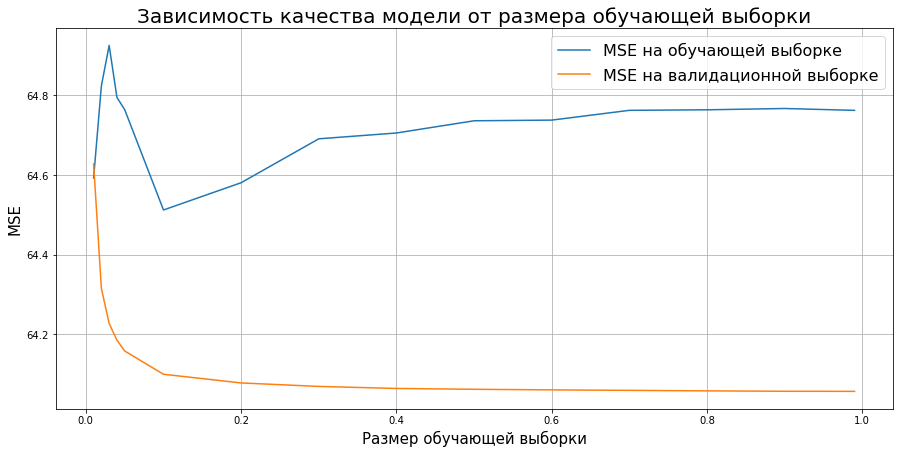

In [171]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.plot(train_sizes, all_train_mse_results, label="MSE на обучающей выборке")
plt.plot(train_sizes, all_valid_mse_results, label="MSE на валидационной выборке")

plt.legend(fontsize=16)
plt.title("Зависимость качества модели от размера обучающей выборки", fontsize=20)
plt.ylabel("MSE", fontsize=15)
plt.xlabel("Размер обучающей выборки", fontsize=15)
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

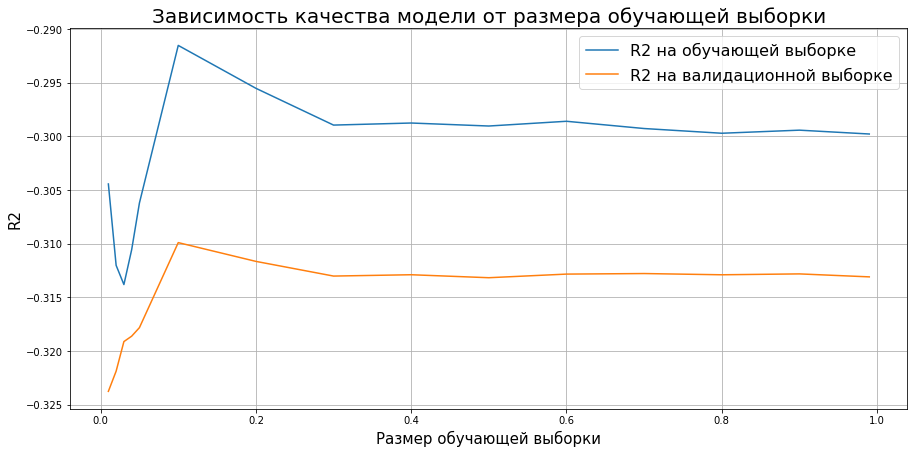

In [172]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.plot(train_sizes, all_train_r2_results, label="R2 на обучающей выборке")
plt.plot(train_sizes, all_valid_r2_results, label="R2 на валидационной выборке")

plt.legend(fontsize=16)
plt.title("Зависимость качества модели от размера обучающей выборки", fontsize=20)
plt.ylabel("R2", fontsize=15)
plt.xlabel("Размер обучающей выборки", fontsize=15)
plt.grid(True)
plt.show

## Идеи для следующих ноутбуков
1. Исследовать влияние предварительной нормализации данных на качество различных моделей:
    1. Использовать различные типы моделей: линейную регрессию, логистическую регрессию, KNN, деревья
    2. Сравнить различные способы нормализации данных. Напр., вычитание среднего и деление на стандартное отклонение. Или вычитание минимального значения и деление на разницу максимального и минимального значения. Или комбинацию этих методов (вычитание среднего и деление на разницу максимального и минимального значения). Или во всех предыдущих методах, где есть среднее, заменить его на медиану (а стандартное отклонение заменить на его аналог, использующий медиану, т.е. медиана от модуля разницы признака и медианного значения признак).
    3. Приведение распределения признака к равномерному с помощью нелинейного преобразования признаков. Описано [Здесь на 1:18:00](https://www.youtube.com/watch?v=aCnuXfWdxVU&list=PLVF5PzSHILHR5d-stEZxHnxE8pr8_m9Ai&index=6)
    